Parte 1

El presidente de Icrania, Rodolfo Zulensky está escapando de las manos de los grusos,
quienes han invadido el país. De hecho, los grusos han cercado la ciudad de Guive y
especialmente un cuadrante de tamaño N x N kilómetros cuadrados (donde cada
kilómetro corresponde a una unidad). En esta zona además, hay soldados de la
resistencia icraniana que se mueven por grupos. Estos K grupos son fijos en tamaño
y buscan o bien acompañar a Zulensky o bien despistar a los grusos.

Ud. es un espía de Zulensky que pasa por asesor de Plutin y sabe de inteligencia
artificial. Plutin le pide que desarrolle un modelo que asista en ubicar a Zulensky para
invitarle un trago… A Ud. se le ocurre que los estornudos y escopetas (Filtro de
partículas) es una manera viable de estimar la ubicación de Zulensky. Ayude a
Zulensky a escapar de Plutin.

En primer lugar comenzamos con la actualizacion del sistema y instalacion de librerias}

In [ ]:
!apt update
!pip install filterpy
!pip install -U matplotlib
!pip install -U scikit-learn

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.co

Ahora se sigue con la importacion de las librerias que ocuparemos.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from numpy.random import uniform

Para poder pillar a Zulensky empleamos el algoritmo de filtro de particulas para poder saber cual sera su siguiente posicion con el aprendizaje de los anteriores movimientos.

En un area de N x N donde N corresponde a kilometros donde x e y estaran definidos de (0,N), se creará una funcion de distribucion de particulas uniformes donde daremos una media de donde podria comenzar en T0 Zulensky, y la cantidad de particulas para el procedimiento. En si es como crear un Monte Carlo de primeras y despues se procedera a la iteracion de muchos monte carlos mientras se hace una prediccion a partir de los anteriores movimientos de Zulensky.

In [ ]:
#rango de x e y, tambien el rango a la distribucion uniforme y cantidad de particulas.
def create_uniform_particles(x_range, y_range, hdg_range, N):
    particles = np.empty((N, 3))
    particles[:, 0] = uniform(x_range[0], x_range[1], size=N)
    particles[:, 1] = uniform(y_range[0], y_range[1], size=N)
    particles[:, 2] = uniform(hdg_range[0], hdg_range[1], size=N)
    particles[:, 2] %= 2 * np.pi
    return particles
  
create_uniform_particles((0,1), (0,1), (0, np.pi*2), 10)

array([[0.83570282, 0.30954686, 3.54329972],
       [0.45354393, 0.21949546, 5.50274807],
       [0.43183356, 0.84682557, 3.83838729],
       [0.74384831, 0.63988312, 4.95247429],
       [0.43196373, 0.22741162, 4.97501457],
       [0.95371616, 0.55081228, 2.14213213],
       [0.82321918, 0.32303339, 1.62155626],
       [0.07147345, 0.18780164, 3.2272261 ],
       [0.45325845, 0.18743804, 2.31902407],
       [0.30113059, 0.26661898, 4.82103295]])

Los datos que se muestran son de 10 particulas en un escenario de 1 x 1 que se distribuyen de forma aleatoria.

Ahora se procede a la predicción para esto cada particula es una representacion a donde podria de estar Zulensky en el mapa, para comenzar la prediccion se debe saber lo que paso en el pasado para el movimiento de las particulas pudan intentar predecir donde estara, tambien cabe destacar que en el caso de una alteracion por algun evento en el movimiento de Zulensky y que esto signifique no poder encontrar a Zulensky para esto agregamos se le agrega ruido al movimiento de las particulas.

In [ ]:
def predict(particles, u, std, dt=1.):
    """ move according to control input u (heading change, velocity)
    with noise Q (std heading change, std velocity)`"""

    N = len(particles)
    # actualizacion de encavezado
    particles[:, 2] += u[0] + (randn(N) * std[0])
    particles[:, 2] %= 2 * np.pi

    # ruido a aplicar a la direccion mandada
    dist = (u[1] * dt) + (randn(N) * std[1])
    particles[:, 0] += np.cos(particles[:, 2]) * dist
    particles[:, 1] += np.sin(particles[:, 2]) * dist

A continuacion se hace la actualizacion de las particulas a partir del teorema de bayes, para esto se ocupa el algoritmo de Bayes

$$\begin{aligned}P(x \mid z) &= \frac{P(z \mid x)\, P(x)}{P(z)} = \frac{\mathtt{likelihood}\times \mathtt{prior}}{\mathtt{normalization}}\end{aligned}$$

In [ ]:
def update(particles, weights, z, R, landmarks):
    for i, landmark in enumerate(landmarks):
        distance = np.linalg.norm(particles[:, 0:2] - landmark, axis=1)
        weights *= scipy.stats.norm(distance, R).pdf(z[i])

    weights += 1.e-300      # cercano a 0
    weights /= sum(weights) # normalizar

En necesario para algunas aplicaciones de funciones la varianza y media pero hay que ir actualizando estos valores mientras se va haciendo cada iteracion de tiempo entonces para esto se crea una funcion de las estimaciones de estado que nos retornara dichos valores para cada actualizacion hecha.



In [ ]:
def estimate(particles, weights):
    #retorna la medio y varianza de particulas

    pos = particles[:, 0:2]
    mean = np.average(pos, weights=weights, axis=0)
    var  = np.average((pos - mean)**2, weights=weights, axis=0)
    return mean, var

Luego se debe hacer el resampling ya que se sufre de un problema de degeneracion, en un t0 todas las particulas estan distribuidas de manera uniforme y un porcentaje muy pequeño de estas estar contribuyendo en donde esta Zulensky entonces para esto aplicamos el algoritmo de resmuestreo para descartar las particulas con baja probabilidad y reemplazarlas por nuevas con una mejor probabilidad.
Para esto se utilizará el algoritmo mas simple de remuestreo llamada resmuestreo aleatorio simple que es a partir de la funcion cumsum.

In [ ]:
def simple_resample(particles, weights):
    N = len(particles)
    cumulative_sum = np.cumsum(weights)
    cumulative_sum[-1] = 1. # avoid round-off error
    indexes = np.searchsorted(cumulative_sum, random(N))

    # resample according to indexes
    particles[:] = particles[indexes]
    weights.fill(1.0 / N)

 Para determinar cuando volver a muestrear debemos utilizar un metodo llamado N efectivo que mide las particulas que contribuyen a la distribucion para encontrar a Zulensky, entonces la ecuacion es la siguiente:

$$N^{eff}=\frac{1}{∑w^2}$$

Cabe recalcar que cuando N cae por debajo del umbral, es cuando se vuelve a muestrear, y la aplicacion de este método es con la siguiente función:

In [ ]:
def neff(weights):
    return 1. / np.sum(np.square(weights))

Por ultimo esta funcion toma una matriz de pesos y devuelve índices a las partículas que se han elegido para el remuestreo. Solo necesitamos escribir una función que realice el remuestreo de estos índices:

In [ ]:
def resample_from_index(particles, weights, indexes):
    particles[:] = particles[indexes]
    weights[:] = weights[indexes]
    weights.fill(1.0 / len(weights))

Para implementar el filtro necesitamos crear las partículas y los puntos de referencia. Luego ejecutamos un bucle, llamando sucesivamente a predict, update, remuestreando y luego calculando la estimación del nuevo estado con estimate.

Error de posición Final, varianza:
	 [-1.99513136e+01  9.24907638e-04] [0.00443565 0.00449988]


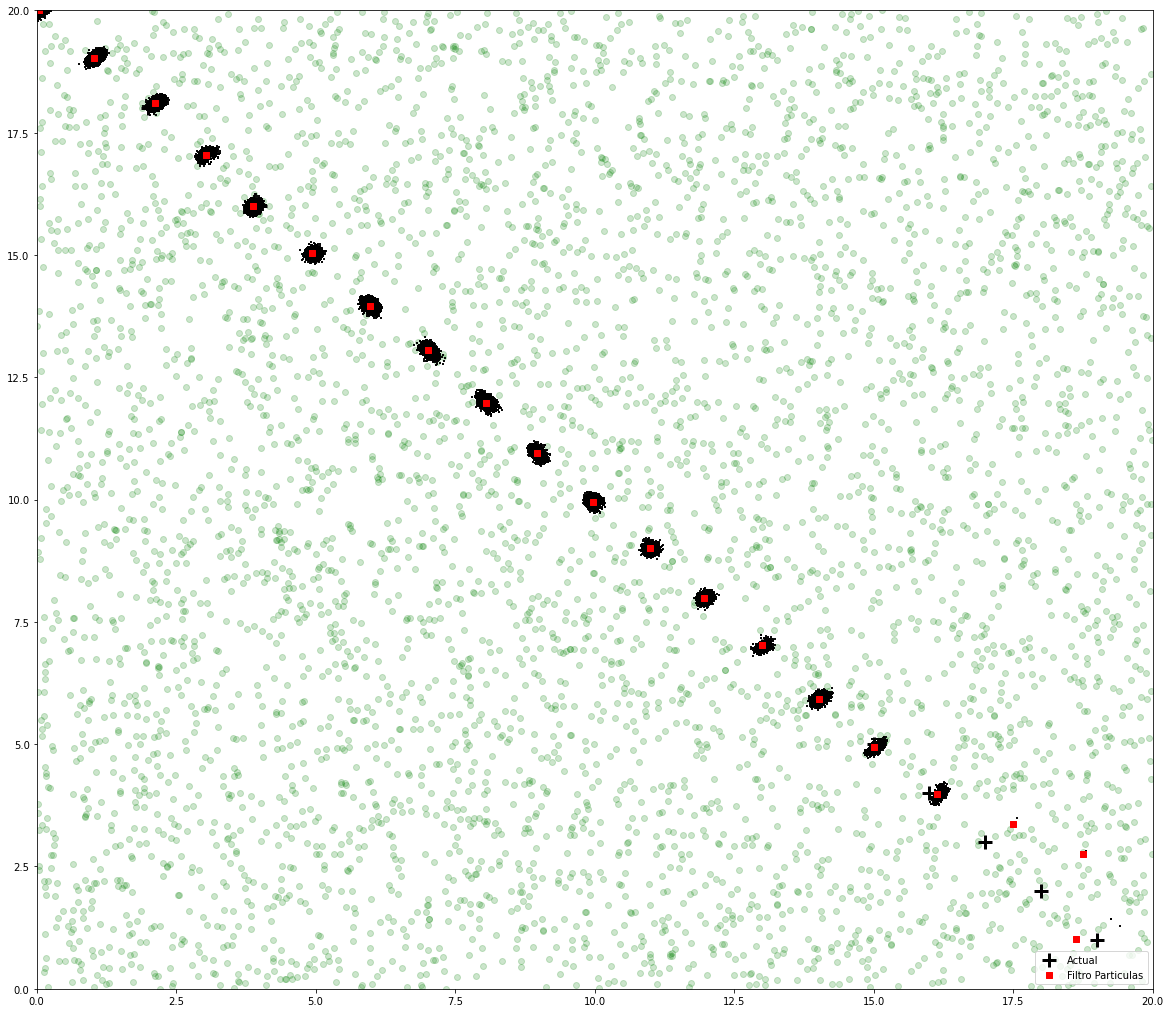

In [ ]:
from filterpy.monte_carlo import systematic_resample
from numpy.linalg import norm
from numpy.random import randn
import scipy.stats



def run_pf1(N, iters=18, sensor_std_err=.1, 
            do_plot=True, plot_particles=False,
            xlim=(0, 20), ylim=(0, 20),
            initial_x=None):
    landmarks = np.array([[-1, 2], [5, 10], [12,14], [18,21]])
    NL = len(landmarks)
    
    plt.figure(figsize=(20,18))
   
    # create particles and weights
    particles = create_uniform_particles((0,20), (0,20), (0, 6.28), N)
    weights = np.ones(N) / N

    if plot_particles:
        alpha = .20
        if N > 5000:
            alpha *= np.sqrt(5000)/np.sqrt(N)           
        plt.scatter(particles[:, 0], particles[:, 1], 
                    alpha=alpha, color='g')
    
    xs = []
    zulensky_pos = np.array([20., 0.])
    for x in range(iters):
        zulensky_pos += (-1, 1)

        # Distancia de Zulensky a cada punto de referencia
        zs = (norm(landmarks - zulensky_pos, axis=1) + 
              (randn(NL) * sensor_std_err))

        # se mueve diagonalmente hacia adelante (x+1, x+1)
        predict(particles, u=(0.00, 1.414), std=(.2, .05))
        
        # Actualizar mediciones
        update(particles, weights, z=zs, R=sensor_std_err, 
               landmarks=landmarks)
        
        # volver a muestrear si hay muy pocas partículas efectivas
        if neff(weights) < N/2:
            indexes = systematic_resample(weights)
            resample_from_index(particles, weights, indexes)
            assert np.allclose(weights, 1/N)
        mu, var = estimate(particles, weights)
        xs.append(mu)

        

        if plot_particles:
            plt.scatter(particles[:, 0], particles[:, 1], 
                        color='k', marker=',', s=1)
        p1 = plt.scatter(zulensky_pos[0], zulensky_pos[1], marker='+',
                         color='k', s=180, lw=3)
        p2 = plt.scatter(mu[0], mu[1], marker='s', color='r')
    
    xs = np.array(xs)
    #plt.plot(xs[:, 0], xs[:, 1])
    plt.legend([p1, p2], ['Actual', 'Filtro Particulas'], loc=4, numpoints=1)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    print('Error de posición Final, varianza:\n\t', mu - np.array([iters, iters]), var)
    plt.show()

from numpy.random import seed
seed(2) 
run_pf1(N=5000, plot_particles=True, iters=20)

Como se puede observar finalmente se hizo un area de tamaño N=20 o mejor dicho 20 x 20 donde en t0 donde las particulas aun no tienen ningun dato de presencia de Zulensky estan dispersas por todo el mapa(verdes) en cambio conforme pasa el tiempo y se han visto pruebas de el movimiento de Zulensky cada vez mas particulas se van acercando a este hasta encerrarlo y de ahi en adelante ya tienen su posicion.

Error de posición Final, varianza:
	 [ 3.96762665 -0.01475132] [0.00333639 0.00321851]


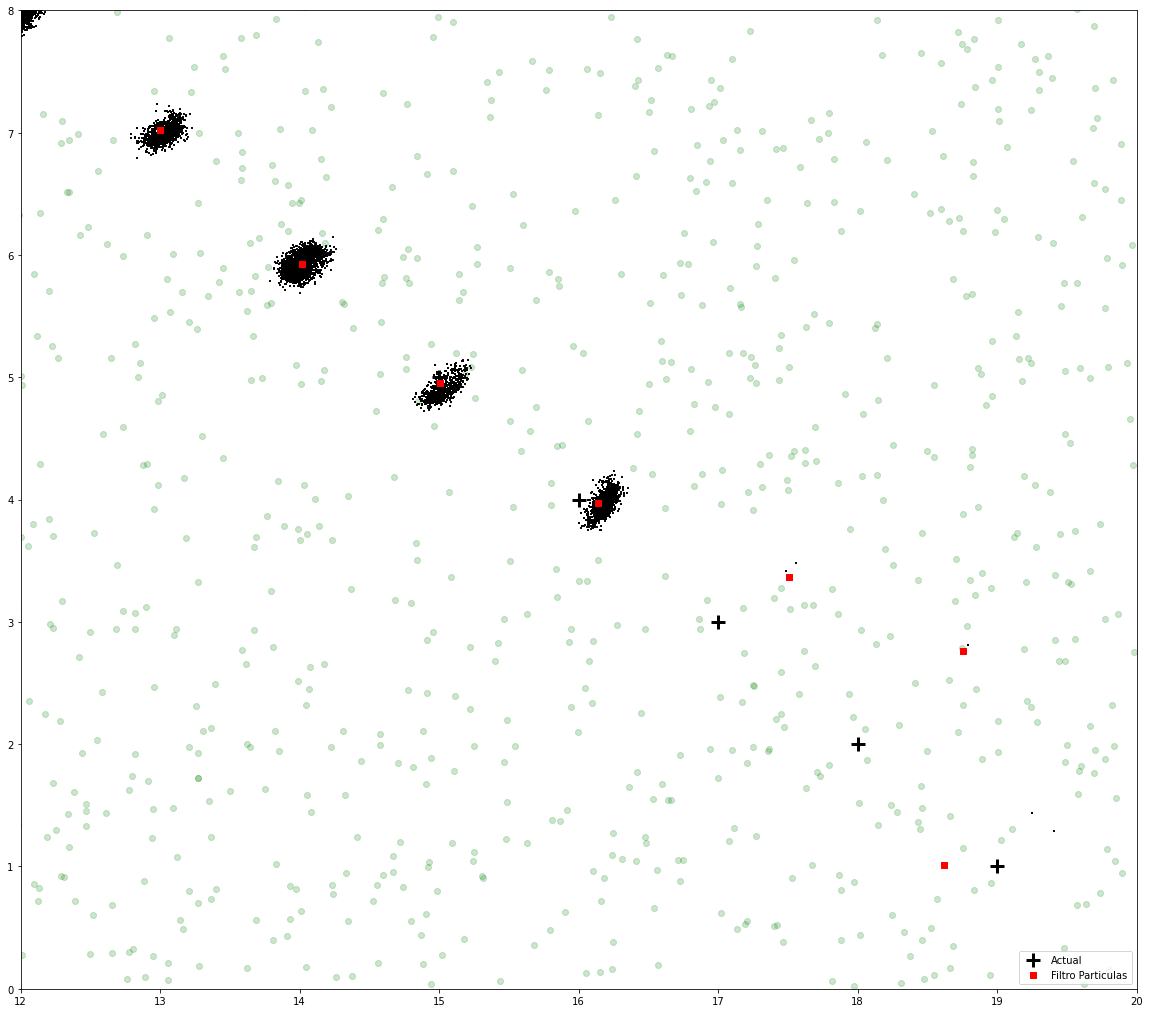

In [ ]:
seed(2)
run_pf1(N=5000, iters=8, plot_particles=True, 
        xlim=(12,20), ylim=(0,8))

Aca podemos verlo con mayor zoom los primeros pasos de Zulensky donde recien en t4 se detecto de manera efectiva el siguiente movimiento de Zulensky y de ahi en adelante ya es detectable.

##Parte 2


Krutos, dios de la gorra vegana, es un asesino de vegetales... en beneficio del mundo, puesto que arma ensaladas de los cuerpos de los caídos. Es imperativo que Krutos conozca bien las proporciones de sus actos. Es decir, debe hacer ensaladas balanceadas. Los enemigos de Krutos incluyen las temibles zanahorias, las omnipresentes lechugas, los astutos brócolis y los vergonzosos tomates. Cada uno de estos enemigos se caracteriza por la cantidad de calorías que aporta, su masa y la cantidad de agua que lo conforma. Además, como Krutos es un brígido, se enfrenta a 1000 de estos tipos. Ayude a Krutos a decidir cómo proceder en su faena identificando dónde está cada grupo de enemigos genere Ud. los 1000 datos) (aleatorios).

En este caso se utilizara un modelo de mezcla gaussiana(GMM), el cual intenta encontrar un modelo de distribucion que modele de mejor manera los datos de entrada.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
import numpy as np

El primer paso es hacer un data set con datos 'aleatorios' de Calorias, Agua y Masa del enemigo.

In [ ]:
data = pd.read_csv("datasettarea2.csv")
data.head()

FileNotFoundError: ignored

Ahora se crean las funciones que utilizaremos, la primera es la que hace las elipses o circulos que abarcan el area de los grupos desde mas concentrados a menos concentrados, y la segunda funcion es pasarle el modelo gaussiano aplicado en 2 variables del dataset para asi poder graficarlo con las elipses.


In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, data, type, label=True, ax=None):
    ax = ax or plt.gca()

    if type == 1:
      labels = gmm.fit(data[["Masa","Agua"]]).predict(data[["Masa","Agua"]])
      ax.scatter(data["Masa"], data["Agua"], c=labels, s=40, cmap='viridis', zorder=2)
    elif type == 2:
      labels = gmm.fit(data[["Masa","Calorias"]]).predict(data[["Masa","Calorias"]])
      ax.scatter(data["Masa"], data["Calorias"], c=labels, s=40, cmap='viridis', zorder=2)
    elif type == 3:
      labels = gmm.fit(data[["Calorias","Agua"]]).predict(data[["Calorias","Agua"]])
      ax.scatter(data["Calorias"], data["Agua"], c=labels, s=40, cmap='viridis', zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

Aca se puede observar la mezcla encontrada entre con los valores de masa y agua, para los distintos enemigos los cuales cada uno representaria un grupo(color).

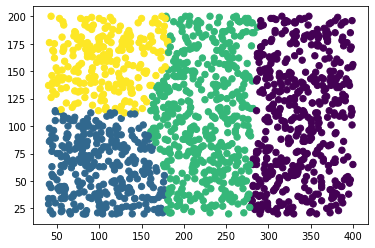

In [ ]:
gmm = GaussianMixture(n_components=4).fit(data[["Masa","Agua"]])
labels = gmm.predict(data[["Masa","Agua"]])
plt.scatter(data["Masa"], data["Agua"], c=labels, s=40, cmap='viridis');

En esta parte ya aplicando la funcion hecha al comienzo, y dando la covarianza completa a cada una de los clusteres(grupos) de enemigos.

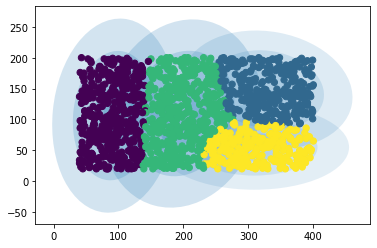

In [ ]:
plot_gmm(gmm, data[["Masa","Agua"]], 1)

Aca se puede observar la segunda mezcla encontrada entre con los valores de masa y calorias, para los distintos enemigos los cuales cada uno representaria un grupo(color).

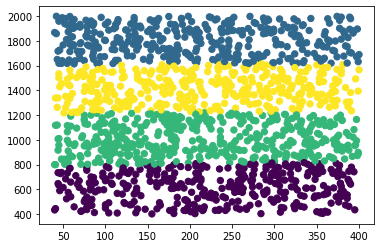

In [ ]:
gmm = GaussianMixture(n_components=4).fit(data[["Masa","Calorias"]])
labels = gmm.predict(data[["Masa","Calorias"]])
plt.scatter(data["Masa"], data["Calorias"], c=labels, s=40, cmap='viridis');

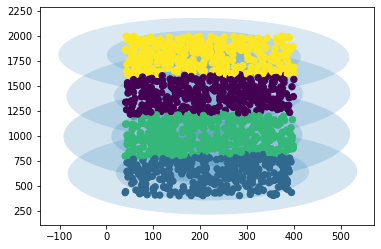

In [ ]:
plot_gmm(gmm, data[["Masa","Calorias"]], 2)

Aca se puede observar la segunda mezcla encontrada entre con los valores de masa y calorias, para los distintos enemigos los cuales cada uno representaria un grupo(color).

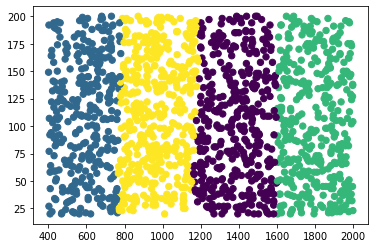

In [ ]:
gmm = GaussianMixture(n_components=4).fit(data[["Calorias","Agua"]])
labels = gmm.predict(data[["Calorias","Agua"]])
plt.scatter(data["Calorias"], data["Agua"], c=labels, s=40, cmap='viridis');

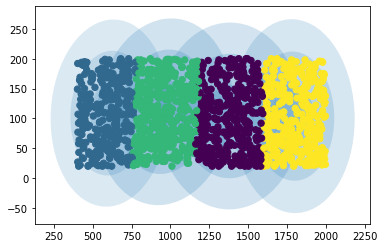

In [ ]:
plot_gmm(gmm, data[["Calorias","Agua"]], 3)

**Conclusion**

Como se pudo observar en la primera parte, el filtro de particulas en los primeros intervalos es como hacer un reconocimiento al movimiento del objeto, hasta ya predecir donde sera su siguiente movimiento, en el caso de que el movimiento de este sea variado este algoritmo no sirve ya que es imposible predecir movimientos aleatorios.

Para la segunda parte se necesitaba hacer grupos de manera optima para la modelacion de este se ocupo el algoritmo de gaussian mixture model el cual intenta encontrar la mejor distribucion para modelar los elementos de entrada y con ello logramos hacer 3 tipos de modelaciones diferentes correspondientes a las entradas que tenian estos, finalmente dio los distintos clusters los cuales cada uno de ellos lo consideraremos como el enemigo de krutos, ya sea el amarillo la zanahoria, el azul el tomate, y asi, despues de ello se logran observar las covarianzas que en este caso como usamos gmm se hacen de manera mas optima que en k-means ya que en gmm se intenta abarcar todos los del grupo y en k-means quedan fuera algunos de estos.